# Simple Linear Regression Task1

### In this task we are building a simple linear regression to predict scores of the student based on the hours of the study

## Author : Chanbas Kalge

In [141]:
# import issential libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set_style("dark")

In [142]:
# read data into student_data: <DataFrame>
student_data = pd.read_csv("https://raw.githubusercontent.com/chanbask007/Task-1-Supervised-ML/main/student_data.csv")
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [143]:
# Check for any missing data
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### we can see that the data is highly co-related :

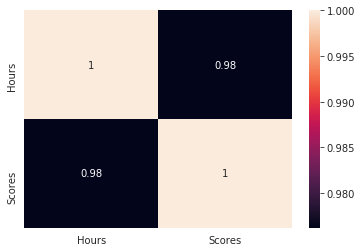

In [145]:
# Check for Corelation Matrix
corr_data = student_data.corr()
sns.heatmap(corr_data, annot=True)

### we can see that the data is slightly skewed to the right but is normally dist. ( approx)

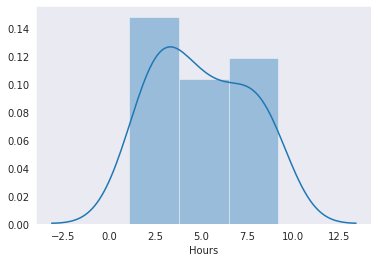

In [122]:
sns.distplot(student_data['Hours'])

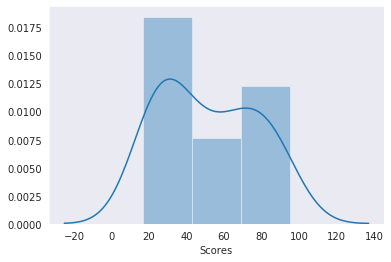

In [123]:
sns.distplot(student_data['Scores'])

### with the help of box plot visualizations we can see the outliers easily, but this dataset contains no outliers

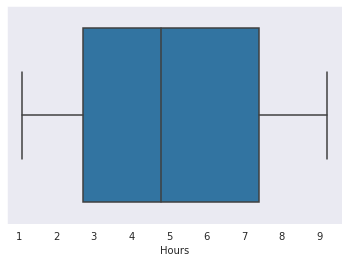

In [124]:
sns.boxplot(student_data['Hours'])

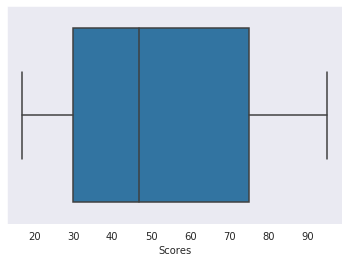

In [125]:
sns.boxplot(student_data['Scores'])

### train the model on training data and evaluate on test data

In [155]:
X = student_data[['Hours']]
y = student_data['Scores']

# split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state= 0)

lr = LinearRegression()

lr.fit(X_train,y_train)
print(lr.intercept_, lr.coef_)

2.018160041434683 [9.91065648]


In [149]:
# y_train_pred = lr.predict(X_train)

In [150]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [130]:
from sklearn.metrics import r2_score
train_score = r2_score(X_train, y_train_pred)
test_score = r2_score(X_test, y_test_pred)
print("Training and Testing scores are {train_score} {test_score} ".format(train_score=train_score, test_score = test_score))

Training and Testing scores are -462.4254528069866 -384.7158052471942 


In [131]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_test_pred)

4.183859899002975

In [132]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_test_pred,multioutput='raw_values'))

[21.59876931]


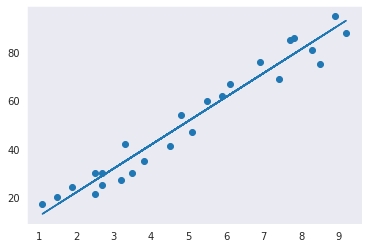

In [152]:
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.plot(X,lr.predict(X))

### What will be predicted score if a student studies for 9.25 hrs/ day ??

In [156]:
study_hours = [[9.25]]
score = lr.predict(study_hours)
print("No of hours studied : {}".format(study_hours))
print("The predicted score is : {}".format(score))

No of hours studied : [[9.25]]
The predicted score is : [93.69173249]


In [157]:
data = pd.DataFrame({"Actual" : y_test, "Predicted" : y_test_pred})
data.head()

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033
